## Manhattan plots: Location on Linkage Group, Location v. FST




1. Align final loci to the Atlantic cod genome, and filter for mapping quality (completed)
2. Plot locations of loci on linkage groups to see density of alignments
3. Calculate FST between east and west
4. Plot locations of loci v. FST



<br>
<br>
#### 2/8/2018

### Aligned Loci Density


#### 1: Create new text file only including locus -- linkage group -- location

In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [2]:
cd ../

/mnt/hgfs/PCod-Compare-repo


In [3]:
infile = open("stacks_b4_wgenome/batch_4_filtered_gadMor2LG_filtered20_filteredAS.sam", "r")
outfile = open("analyses/ManhattanPlots/batch_4_filteredMQ_filteredAS_aligned_loci.txt", "w")
outfile.write("Locus\tLG\tPosition\n")
for line in infile:
    linelist = line.strip().split()
    new_list = [linelist[0], linelist[2], linelist[3]]
    outfile.write("\t".join(new_list) + "\n")
infile.close()
outfile.close()

In [4]:
infile = open("stacks_b8_wgenome_r05/batch_8_m3_filtered_gadMor2LG_filtered20_filteredAS.sam", "r")
outfile = open("analyses/ManhattanPlots/batch_8_filteredMQ_filteredAS_aligned_loci.txt", "w")
outfile.write("Locus\tLG\tPosition\n")
for line in infile:
    linelist = line.strip().split()
    new_list = [linelist[0], linelist[2], linelist[3]]
    outfile.write("\t".join(new_list) + "\n")
infile.close()
outfile.close()

#### 2: Save total sizes of each linkage group

In [5]:
infile = open("ACod_reference/lg_scaff_lengths.txt", "r")
infile.readline() #header
lgtl_dict = {}
line = infile.readline()
while line.startswith("LG"):
    lgtl_dict[line.strip().split()[0]] = int(line.strip().split()[1])
    line = infile.readline()
infile.close()

In [6]:
print lgtl_dict["LG21"]

22510304


<br>
#### 3. How many loci per LG, and the average distance between them?

*note that I could not use list comprehension here because of the ValueError "too many values to unpack"*


#### Batch 4

In [28]:
outfile = open("analyses/ManhattanPlots/batch_4_filteredMQ_filteredAS_alignment_summary.txt", "w")
avg_dist_list = []
nloci_list = []
outfile.write("LG\tn_loci\tavg_dist\n")
for lg in lgtl_dict.keys():
    new_pos_list = []
    infile = open("analyses/ManhattanPlots/batch_4_filteredMQ_filteredAS_aligned_loci.txt", "r")
    for line in infile:
        linelist = line.strip().split()
        if linelist[1] == lg:
            new_pos_list.append(linelist[2])
    infile.close()
    nloci_list.append(len(new_pos_list))
    print "There are ", len(new_pos_list), " loci aligned to ", lg
    
    pos_list_sorted = sorted(new_pos_list, key=int)
    all_distances = []
    for i in range(0,len(pos_list_sorted) - 1):
        new_dist = int(pos_list_sorted[i+1]) - int(pos_list_sorted[i])
        all_distances.append(new_dist)
    avg_dist = float(sum(all_distances))/float(len(all_distances))
    avg_dist_list.append(avg_dist)
    outfile.write(lg + "\t" + str(len(new_pos_list)) + "\t" + str(avg_dist) + "\n")
    print "The average distance (in base pairs) between loci is: ", avg_dist, "base pairs"
    print " ---- "
outfile.close()

print "----"
print "The overall average distance (in base pairs) between loci is: ", float(sum(avg_dist_list))/float(len(avg_dist_list)), " base pairs"
print "The overall average number of loci aligned per linkage group is: ", float(sum(nloci_list))/float(len(nloci_list)), " loci"

There are  104  loci aligned to  LG21
The average distance (in base pairs) between loci is:  212904.68932 base pairs
 ---- 
There are  120  loci aligned to  LG20
The average distance (in base pairs) between loci is:  195378.319328 base pairs
 ---- 
There are  103  loci aligned to  LG23
The average distance (in base pairs) between loci is:  225112.794118 base pairs
 ---- 
There are  86  loci aligned to  LG22
The average distance (in base pairs) between loci is:  248392.176471 base pairs
 ---- 
There are  111  loci aligned to  LG09
The average distance (in base pairs) between loci is:  220169.481818 base pairs
 ---- 
There are  127  loci aligned to  LG08
The average distance (in base pairs) between loci is:  208951.047619 base pairs
 ---- 
There are  119  loci aligned to  LG07
The average distance (in base pairs) between loci is:  255226.559322 base pairs
 ---- 
There are  122  loci aligned to  LG06
The average distance (in base pairs) between loci is:  196045.38843 base pairs
 ---- 
The

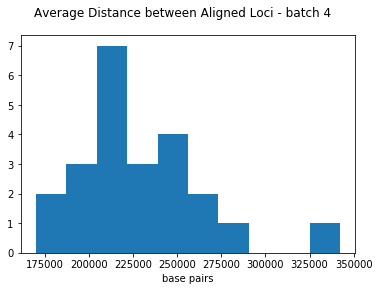

In [18]:
import matplotlib.pyplot as plt
import numpy as np
infile = open("analyses/ManhattanPlots/batch_4_filteredMQ_filteredAS_alignment_summary.txt", "r")
infile.readline()
distances = []
for line in infile:
    distances.append(float(line.strip().split()[2]))
infile.close()
plt.hist(distances)
plt.suptitle("Average Distance between Aligned Loci - batch 4")
plt.xlabel("base pairs")
plt.show()

In [19]:
plt.close()

*For Comparison:* In Sodeland et al. (2016), they found...

"There was an average of 409 SNPs per chromosome, with a maximum of 554 (LG07) and a minimum of 279 (LG19)"

Genomic regions of elevated divergence were detected as: 
1. 205 SNPs in 13 Mb -- avg distance between = 63414.63 base pairs
2. 85 SNPs in 5 Mb -- avg dist = 58823.53 base pairs
3. 193 SNPs in 9.5 Mb -- avg dist = 49222.8 base pairs

#### Batch 8

In [29]:
outfile = open("analyses/ManhattanPlots/batch_8_filteredMQ_filteredAS_alignment_summary.txt", "w")
outfile.write("LG\tn_loci\tavg_dist\n")
avg_dist_list = []
nloci_list = []
for lg in lgtl_dict.keys():
    new_pos_list = []
    infile = open("analyses/ManhattanPlots/batch_8_filteredMQ_filteredAS_aligned_loci.txt", "r")
    for line in infile:
        linelist = line.strip().split()
        if linelist[1] == lg:
            new_pos_list.append(linelist[2])
    infile.close()
    print "There are ", len(new_pos_list), " loci aligned to ", lg
    nloci_list.append(len(new_pos_list))
    
    pos_list_sorted = sorted(new_pos_list, key=int)
    all_distances = []
    for i in range(0,len(pos_list_sorted) - 1):
        new_dist = int(pos_list_sorted[i+1]) - int(pos_list_sorted[i])
        all_distances.append(new_dist)
    avg_dist = float(sum(all_distances))/float(len(all_distances))
    outfile.write(lg + "\t" + str(len(new_pos_list)) + "\t" + str(avg_dist) + "\n")
    avg_dist_list.append(avg_dist)
    print "The average distance (in base pairs) between loci is: ", avg_dist, "base pairs"
    print " ---- "
outfile.close()


print "----"
print "The overall average distance (in base pairs) between loci is: ", float(sum(avg_dist_list))/float(len(avg_dist_list)), " base pairs"
print "The overall average number of loci aligned per linkage group is: ", float(sum(nloci_list))/float(len(nloci_list)), " loci"

There are  152  loci aligned to  LG21
The average distance (in base pairs) between loci is:  147912.496689 base pairs
 ---- 
There are  153  loci aligned to  LG20
The average distance (in base pairs) between loci is:  158012.894737 base pairs
 ---- 
There are  151  loci aligned to  LG23
The average distance (in base pairs) between loci is:  153076.7 base pairs
 ---- 
There are  142  loci aligned to  LG22
The average distance (in base pairs) between loci is:  149739.964539 base pairs
 ---- 
There are  171  loci aligned to  LG09
The average distance (in base pairs) between loci is:  143915.752941 base pairs
 ---- 
There are  165  loci aligned to  LG08
The average distance (in base pairs) between loci is:  156345.981707 base pairs
 ---- 
There are  175  loci aligned to  LG07
The average distance (in base pairs) between loci is:  174536.781609 base pairs
 ---- 
There are  152  loci aligned to  LG06
The average distance (in base pairs) between loci is:  167038.258278 base pairs
 ---- 
There

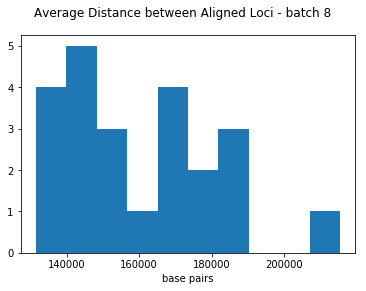

In [30]:
import matplotlib.pyplot as plt
import numpy as np
infile = open("analyses/ManhattanPlots/batch_8_filteredMQ_filteredAS_alignment_summary.txt", "r")
infile.readline()
distances = []
for line in infile:
    distances.append(float(line.strip().split()[2]))
infile.close()
plt.hist(distances)
plt.suptitle("Average Distance between Aligned Loci - batch 8")
plt.xlabel("base pairs")
plt.show()

In [31]:
plt.close()

*For Comparison:* In Sodeland et al. (2016), they found...

"There was an average of 409 SNPs per chromosome, with a maximum of 554 (LG07) and a minimum of 279 (LG19)"

Genomic regions of elevated divergence were detected as: 
1. 205 SNPs in 13 Mb -- avg distance between = 63414.63 base pairs
2. 85 SNPs in 5 Mb -- avg dist = 58823.53 base pairs
3. 193 SNPs in 9.5 Mb -- avg dist = 49222.8 base pairs

<br>
<br>
### FST between east and west

In order to do this, I first need to remove replicated and contaminated individuals from the Korean populations. I can do this using the text file that I created when working solely with the Korean data: `batch_8_samples_reps_contam_removed.txt`

In genepop, option `6 >> 2`



#### Batch 8

In [4]:
pwd

u'/mnt/hgfs/PCod-Compare-repo'

In [5]:
cd stacks_b8_wgenome_r05/

/mnt/hgfs/PCod-Compare-repo/stacks_b8_wgenome_r05


In [44]:
# open file and read all lines into a string 
infile = open("batch_8_filteredMAF_filteredLoci30_filteredIndivids_filteredHWE_genepop_noreps_eastwest.txt.ST2", "r")
lines = infile.read()
infile.close()

# split the string into a list, with each element starting with "Locus:"
linelist = lines.split("Locus:")[1:]

# save the locus name and FST from each element into a dictionary
fst_dict = {}
for i in linelist:
    ilist = i.strip().split()
    fst_dict[ilist[0].split("_")[0]] = ilist[5]

# write to output file
outfile = open("batch_8_filteredMAF_filteredLoci30_filteredIndivids_filteredHWE_eastwest_fst_parsed.txt", "w")
outfile.write("Locus\tFst\n")

fst_list = []
for i in fst_dict.keys():
    fst_list.append(fst_dict[i])
    outfile.write(i + "\t" + fst_dict[i] + "\n")
outfile.close()

In [45]:
len(fst_dict.keys())

5682

In [46]:
fst_dict['3']

'0.0142'

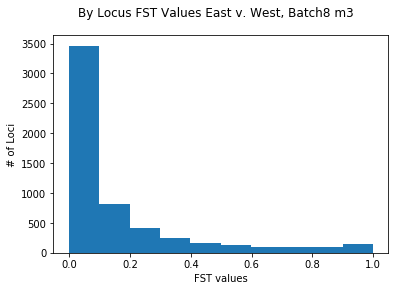

In [47]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in fst_list])
plt.suptitle("By Locus FST Values East v. West, Batch8 m3")
plt.xlabel("FST values")
plt.ylabel("# of Loci")
plt.show()

In [48]:
plt.close()

<br>
<br>

#### Batch 4

In [6]:
cd ../stacks_b4_wgenome/

/mnt/hgfs/PCod-Compare-repo/stacks_b4_wgenome


In [8]:
# open file and read all lines into a string 
infile = open("batch_4_MB_filteredMAF_filteredLoci50_filteredIndivids_filteredHWE_noreps_genepop_EASTWEST.txt.ST2", "r")
lines = infile.read()
infile.close()

# split the string into a list, with each element starting with "Locus:"
linelist = lines.split("Locus:")[1:]

# save the locus name and FST from each element into a dictionary
fst_dict = {}
for i in linelist:
    ilist = i.strip().split()
    fst_dict[ilist[0].split("_")[0]] = ilist[5]
    if ilist[5] == "-":
        print "crap! check locus " + ilist[0]

# write to output file
outfile = open("batch_4_MB_filteredMAF_filteredLoci50_filteredIndivids50_filteredHWE_eastwest_fst_parsed.txt", "w")
outfile.write("Locus\tFst\n")

fst_list = []
for i in fst_dict.keys():
    if fst_dict[i] != "-":
        fst_list.append(fst_dict[i])
    outfile.write(i + "\t" + fst_dict[i] + "\n")
outfile.close()

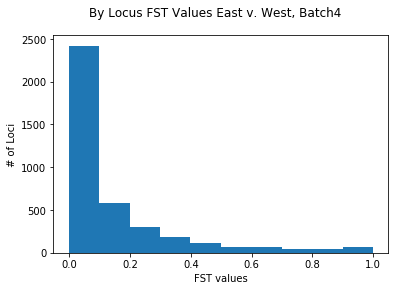

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in fst_list])
plt.suptitle("By Locus FST Values East v. West, Batch4")
plt.xlabel("FST values")
plt.ylabel("# of Loci")
plt.show()

In [11]:
plt.close()

<br>
<br>

### FST between Western Regions

#### 2/15/2018

#### Batch 8

In [1]:
pwd

u'/mnt/hgfs/PCod-Compare-repo/notebooks'

In [2]:
cd ../stacks_b8_wgenome_r05

/mnt/hgfs/PCod-Compare-repo/stacks_b8_wgenome_r05


In [12]:
# open file and read all lines into a string 
infile = open("batch_8_filteredMAF_filteredLoci30_filteredIndivids_filteredHWE_genepop_noreps_west.txt.ST2", "r")
lines = infile.read()
infile.close()

# split the string into a list, with each element starting with "Locus:"
linelist = lines.split("Locus:")[1:]

# save the locus name and FST from each element into a dictionary
fst_dict = {}
for i in linelist:
    ilist = i.strip().split()
    fst_dict[ilist[0].split("_")[0]] = ilist[6]

# write to output file
outfile = open("batch_8_filteredMAF_filteredLoci30_filteredIndivids_filteredHWE_west_fst_parsed.txt", "w")
outfile.write("Locus\tFst\n")

fst_list = []
fst_miss = 0
total = 0
for i in fst_dict.keys():
    if fst_dict[i] != "-":
        fst_list.append(fst_dict[i])
    else:
        fst_miss += 1
    outfile.write(i + "\t" + fst_dict[i] + "\n")
    total += 1
outfile.close()
print fst_miss, " loci out of ", total, " are missing Fst values."

1292  loci out of  5682  are missing Fst values.


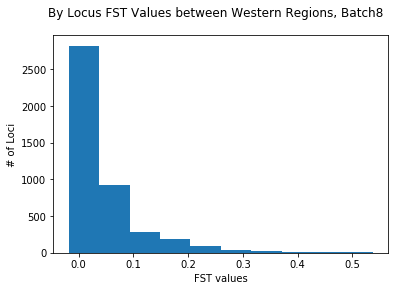

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist([float(i) for i in fst_list])
plt.suptitle("By Locus FST Values between Western Regions, Batch8")
plt.xlabel("FST values")
plt.ylabel("# of Loci")
plt.show()

In [8]:
plt.close()